## Detecção do Covid -19 em Imagens com Inteligência Artificial


## Machine Learning WorkFlow

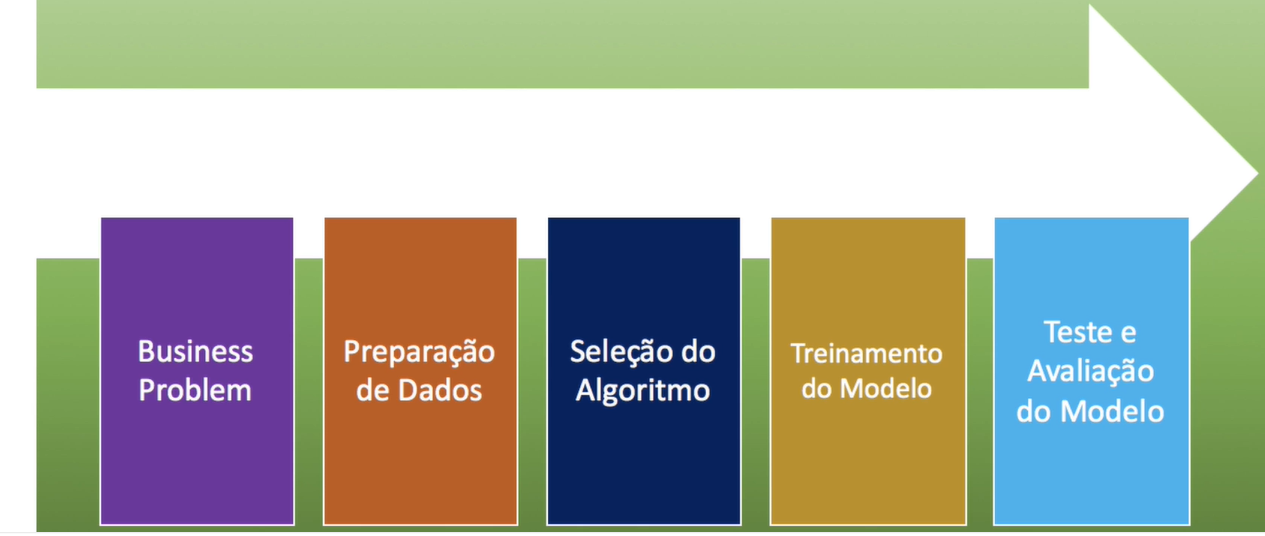

In [1]:
from IPython.display import Image
Image('imagens/MachineLerningWorkflow.png')

# Business Problem


#Redes neurais Convolucionais 

Em redes neurais convolucionais, os dados de entrada são muitas vezes moldados como uma matriz 3D (número de canais, largura da imagem, altura), que preserva a relação espacial entre os pixels. Na figura abaixo, a imagem 3 é um único canal (tons de cinza) de dados, portanto, a dimensão de entrada é especificada como uma tupla (1, largura da imagem, altura da imagem).

![MNIST-flat](https://www.cntk.ai/jup/cntk103a_MNIST_input.png)

# Preparação dos dados

## repositorio do Data set

O repositorio 1 foi retirado do site
https://www.kaggle.com/bachrr/covid-chest-xray

Imagens de raio X COVID-19
Sobre
Este conjunto de dados é um banco de dados de casos COVID-19 com radiografia de tórax ou imagens de TC. Ele contém casos do COVID-19, além de MERS , SARS e ARDS .

fundo
O COVID é possivelmente melhor diagnosticado usando imagem radiológica Fang, 2020 . As empresas estão desenvolvendo ferramentas de IA e implantando-as em hospitais Wired 2020 . Deveríamos ter um banco de dados aberto para desenvolver ferramentas gratuitas que também fornecerão assistência.


Metadados
Aqui está uma lista de cada campo de metadados, com explicações:

Patientid (identificador interno, apenas para este conjunto de dados)
offset (number of days since the start of symptoms or hospitalization for each image, this is very important to have when there are multiple images for the same patient to track progression while being imaged. If a report says "after a few days" let's assume 5 days.)
sex (M, F, or blank)
age (age of the patient in years)
finding (which pneumonia)
survival (did they survive? Y or N)
view (for example, PA, AP, or L for X-rays and Axial or Coronal for CT scans)
modality (CT, X-ray, or something else)
date (date the image was acquired)
location (hospital name, city, state, country) importance from right to left.
filename
doi (DOI of the research article
url (URL of the paper or website where the image came from)
license
clinical notes (about the radiograph in particular, not just the patient)
other notes (e.g. credit)
Data Exp


## pacotes necessários

In [34]:
import  sklearn

In [35]:
import pandas as pd
import os
import sys
import inspect
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pçt
from datetime import datetime
from tensorflow.python.framework import ops
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings

## baixar os arquivos necessários

In [43]:
getArquivosGoogleDrive = 0
diretorio_base_1 =""


if(getArquivosGoogleDrive ==0):
    diretorio_base_1 ='D:\Repos\AprendendoPython\MachineLearning\Pos-GraduacaoCovid19' 



In [44]:

metadata   = pd.read_csv(diretorio_base_1 +'\dataset\covid-chest-xray\metadata.csv')

In [45]:
print("Quantidade de imagens no diretorio 1: {} ".format(len(metadata))) 

Quantidade de imagens no diretorio 1: 372 


### variaveis

In [17]:
list(metadata)

['patientid',
 'offset',
 'sex',
 'age',
 'finding',
 'survival',
 'intubated',
 'intubation_present',
 'went_icu',
 'in_icu',
 'needed_supplemental_O2',
 'extubated',
 'temperature',
 'pO2_saturation',
 'leukocyte_count',
 'neutrophil_count',
 'lymphocyte_count',
 'view',
 'modality',
 'date',
 'location',
 'folder',
 'filename',
 'doi',
 'url',
 'license',
 'clinical_notes',
 'other_notes',
 'Unnamed: 28']

In [23]:
resumo =  metadata[["patientid","sex","age","finding","filename"]]

In [27]:

resumo.columns = ["patientId","sexo","idade","prognostico","imagem"]


resumo.head()

,patientId,sexo,idade,prognostico,imagem
0,2,M,65.0,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,2,M,65.0,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,M,65.0,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,2,M,65.0,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,F,52.0,COVID-19,nejmc2001573_f1a.jpeg
